# Machine Learning Zoomcamp Homeworks

## Week 8

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this,
we will use the "Dogs & Cats" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). 

You need to download the `train.zip` file.

If you have troubles downloading from Kaggle, use [this link](https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip) instead:

```bash
wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You don't need a computer with a GPU for this homework. A laptop or any personal computer should be sufficient. 


### Data Preparation

The dataset contains 12,500 images of cats and 12,500 images of dogs. 

Now we need to split this data into train and validation

* Create a `train` and `validation` folders
* In each folder, create `cats` and `dogs` folders
* Move the first 10,000 images to the train folder (from 0 to 9999) for boths cats and dogs - and put them in respective folders
* Move the remaining 2,500 images to the validation folder (from 10000 to 12499)

You can do this manually or with Python (check `os` and `shutil` packages).


### Model

For this homework we will use Convolutional Neural Network (CNN. Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a covolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`


For clarification about kernel size and max pooling, check [Week #11 Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [1]:
# let's start with essential imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline


# model variables according to the assignment requirements
input_image_size  = (150, 150)
input_image_depth = 3 # RGB image, 3 channels for each pixel
input_image_shape = (input_image_size[0], input_image_size[1], input_image_depth)
filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
dense_size = 64
output_size = 1 # binary classification (output is either 0 or 1, so 1 output node is enough)
output_activation = 'sigmoid' # we use sigmoid activation function for binary classification
learning_rate = 0.002
momentum = 0.8


# model definition in functional style

# input layer definition
input_layer = keras.Input(shape=input_image_shape)

# convolutional layer with 32 filters, 3x3 kernel size (all defined in model variables) and ReLU activation
conv_layer = keras.layers.Conv2D(filters, kernel_size, activation='relu')(input_layer)

# max pooling layer with 2x2 pool size
pool_layer = keras.layers.MaxPool2D(pool_size)(conv_layer)

# flatten layer
flatten_layer = keras.layers.Flatten()(pool_layer)

# dense layer with 64 nodes and ReLU activation
dense_layer = keras.layers.Dense(dense_size, activation='relu')(flatten_layer)

# output layer with 1 node and sigmoid activation
output_layer = keras.layers.Dense(output_size, activation=output_activation)(dense_layer)

# create model
model = keras.Model(inputs=input_layer, outputs=output_layer)


# model compilation
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

### Question #1
Since we have a binary classification problem, what is the best loss function for us?<br>
Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

- mean squared error
- categorical cross-entropy
- binary cross-entropy

answer to question #1:

We have a binary distribution for target class (classes are either _"cat"_ or _"dog"_). A common loss function for categorical classifications is "Cross Entropy". __"Binary Cross Entropy"__ is the sub-type we can utilize for binary classification tasks, so the answer would be the third choice.<br>
The formula for binary cross entropy loss is as follows:<br>
$$
Binary Cross Entropy = -{(y\log(p) + (1 - y)\log(1 - p))}
$$

where _p_ is the predicted value and _y_ is the true value.

### Question #2

What's the total number of parameters of the model? You can use the `summary` method for that.
- 7,215,873
- 9,215,873
- 11,215,873
- 13,215,873

In [2]:
# answer to question #2:

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

As it is clear from model summary, total parameters value equals to __11,215,873__.

### Generators and Training

For the next two questions, use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and validation

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)
```
Note `validation_steps=50` - this parameter says "run only 50 steps on the validation data for evaluating the results". 
This way we iterate a bit faster, but don't use the entire validation dataset.
That's why it's important to shuffle the validation dataset as well. 

In [3]:
batch_size = 20

# train & validation data paths on your local machine
PATH_TRAIN = 'D:/ML/Datasets/Dogs & Cats/train'
PATH_VALIDATION = 'D:/ML/Datasets/Dogs & Cats/validation'

# define train and validation data generators
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

# define train and validation datasets
train_ds = train_gen.flow_from_directory(
    directory=PATH_TRAIN,
    target_size=input_image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True)

valid_ds = valid_gen.flow_from_directory(
    directory=PATH_VALIDATION,
    target_size=input_image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True)

# train the model
train_history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_ds,
    validation_steps=50
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 27s 207ms/step - loss: 0.7070 - accuracy: 0.5030 - val_loss: 0.6878 - val_accuracy: 0.5440
Epoch 2/10
100/100 [==============================] - 19s 188ms/step - loss: 0.6871 - accuracy: 0.5480 - val_loss: 0.6803 - val_accuracy: 0.5810
Epoch 3/10
100/100 [==============================] - 18s 178ms/step - loss: 0.6849 - accuracy: 0.5555 - val_loss: 0.6792 - val_accuracy: 0.5480
Epoch 4/10
100/100 [==============================] - 16s 165ms/step - loss: 0.6679 - accuracy: 0.5805 - val_loss: 0.6782 - val_accuracy: 0.5640
Epoch 5/10
100/100 [==============================] - 15s 150ms/step - loss: 0.6633 - accuracy: 0.5935 - val_loss: 0.6876 - val_accuracy: 0.5490
Epoch 6/10
100/100 [==============================] - 14s 143ms/step - loss: 0.6718 - accuracy: 0.5685 - val_loss: 0.6679 - val_accuracy: 0.5860
Epoch 7/10
100/100 [=========================

### Question #3

What is the median of training accuracy for this model?
- 0.36
- 0.56
- 0.76
- 0.96

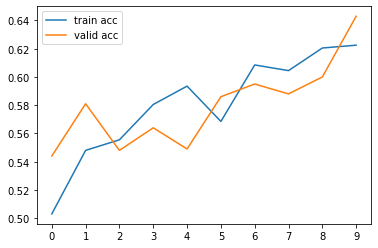

In [4]:
# answer to question #3

# let's first plot the training and validation accuracy
plt.plot(train_history.history['accuracy'], label='train acc')
plt.plot(train_history.history['val_accuracy'], label='valid acc')
plt.xticks(np.arange(10))
plt.legend()

In [5]:
# answer to question #3 (continued)

# median of training accuracy
train_acc_median = np.median(train_history.history['accuracy'])
print('Median of training accuracy:', round(train_acc_median, 2))

Median of training accuracy: 0.59


The closest value to the above number among the choices would be __0.56__.

### Question #4

What is the standard deviation of training loss for this model?
- 0.001
- 0.01
- 0.1
- 1

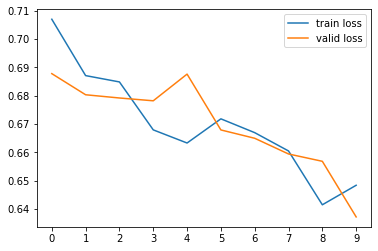

In [6]:
# answer to question #4

# again, let's plot the training and validation loss
plt.plot(train_history.history['loss'], label='train loss')
plt.plot(train_history.history['val_loss'], label='valid loss')
plt.xticks(np.arange(10))
plt.legend()

In [7]:
# answer to question #4 (continued)

# standard deviation of training loss
train_loss_std = np.std(train_history.history['loss'])
print('Standard deviation of training loss:', round(train_loss_std, 3))

Standard deviation of training loss: 0.018


That gives us __0.01__ as the closest answer.

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [8]:
# create new data generator for training data with required augmentations
train_gen_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# re-initialize train dataset with new train data generator
train_ds_augmentation = train_gen_augmentation.flow_from_directory(
    directory=PATH_TRAIN,
    target_size=input_image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True)

Found 20000 images belonging to 2 classes.


### Question #5

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of validation loss for the model trained with augmentations?
- 0.27
- 0.47
- 0.67
- 0.97

In [9]:
# answer to question #5

# train the model again with augmented data
train_history_augmentation = model.fit(
    train_ds_augmentation,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 18s 184ms/step - loss: 0.6678 - accuracy: 0.5855 - val_loss: 0.6387 - val_accuracy: 0.6170
Epoch 2/10
100/100 [==============================] - 19s 186ms/step - loss: 0.6622 - accuracy: 0.5775 - val_loss: 0.6301 - val_accuracy: 0.6390
Epoch 3/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6624 - accuracy: 0.5815 - val_loss: 0.6279 - val_accuracy: 0.6650
Epoch 4/10
100/100 [==============================] - 19s 194ms/step - loss: 0.6557 - accuracy: 0.6010 - val_loss: 0.6375 - val_accuracy: 0.6250
Epoch 5/10
100/100 [==============================] - 19s 194ms/step - loss: 0.6679 - accuracy: 0.5765 - val_loss: 0.6474 - val_accuracy: 0.6070
Epoch 6/10
100/100 [==============================] - 21s 207ms/step - loss: 0.6592 - accuracy: 0.5860 - val_loss: 0.6381 - val_accuracy: 0.6300
Epoch 7/10
100/100 [==============================] - 19s 188ms/step - loss: 0.6455 - accuracy: 0.6370 - val_loss: 0.6073 - val_ac

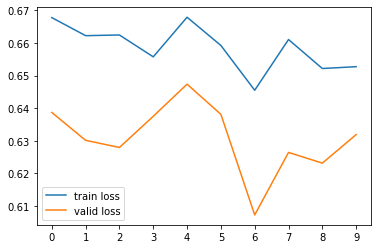

In [10]:
# answer to question #5 (continued)

# let's plot the training and validation loss for new training
plt.plot(train_history_augmentation.history['loss'], label='train loss')
plt.plot(train_history_augmentation.history['val_loss'], label='valid loss')
plt.xticks(np.arange(10))
plt.legend()

In [11]:
# answer to question #5 (continued)

# mean of validation loss
valid_loss_mean = np.mean(train_history_augmentation.history['val_loss'])
print('Mean of validation loss:', round(valid_loss_mean, 2))

Mean of validation loss: 0.63


The closest value to the above number among the choices would be __0.67__.

### Question #6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?
- 0.25
- 0.45
- 0.65
- 0.85

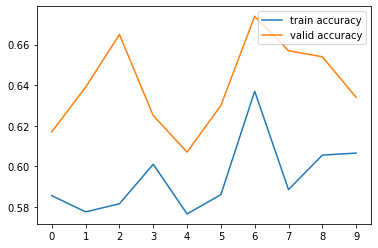

In [12]:
# answer to question #6

# let's plot the accuracy for training and validation of the new model first
plt.plot(train_history_augmentation.history['accuracy'], label='train accuracy')
plt.plot(train_history_augmentation.history['val_accuracy'], label='valid accuracy')
plt.xticks(np.arange(10))
plt.legend()

In [13]:
# answer to question #6 (continued)

# average of validation accuracy for the last 5 epochs of the model trained with augmentations
valid_acc_avg_last5 = np.average((train_history_augmentation.history['val_accuracy'])[5:10])
print('Average of validation accuracy for the last 5 epochs of the model trained with augmentations:', round(valid_acc_avg_last5, 2))

Average of validation accuracy for the last 5 epochs of the model trained with augmentations: 0.65


Therefore, the answer would be __0.65__ among the choices.